In [1]:
import glob
import os
import xarray as xr
import numpy as np

In [3]:
"""Subset and merge GLEAM v4.1a soil moisture data from 2000-2023"""

'Subset and merge GLEAM v4.1a soil moisture data from 2000-2023'

In [3]:
variables = ["E","Et","S","SMrz","SMs"]
src_dir = r"D:/VUB/_data/gleam_v41/daily_data"
outf = r"D:/VUB/_data/nc_files"

In [ ]:
for var in variables:
    subset_=[]
    files = glob.glob(os.path.join(src_dir, f"{var}_*.nc"))
    for file in files:
        ds=xr.open_dataset(file, engine='netcdf4')
        #subset to study area  
        ds_subset=ds.sel(lat=slice(10, -6), lon=slice(30, 45))
        subset_.append(ds_subset)

    ds=xr.merge(subset_)

    print(f"Saving {var}...", end="\r")
    ds.to_netcdf(f"{outf}/gleam_{var}_EAS_2000_2023.nc")

In [13]:
ds_ts=ds['SMs'].sel(lon=36.65,lat=1, method='nearest')
ds_df=ds_ts.to_dataframe().drop(columns=['lat','lon'])

<Axes: xlabel='time'>

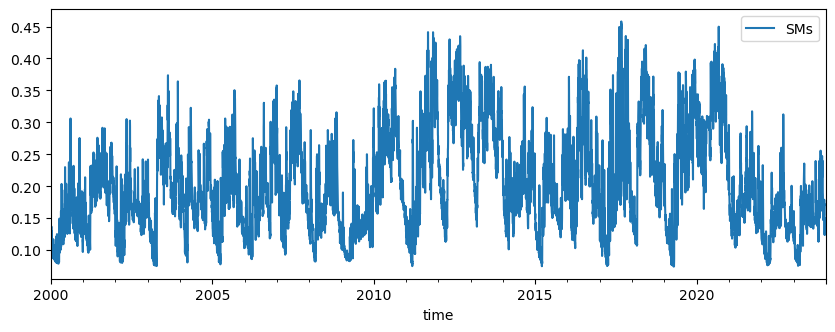

In [14]:
ds_df.plot(figsize=(10,3.5))

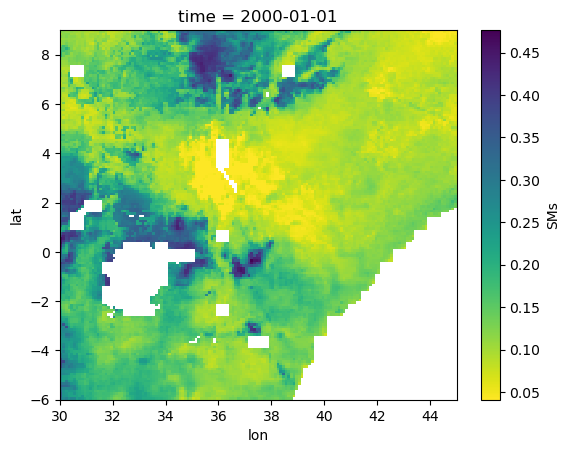

In [18]:
ds['SMs'][0].plot(cmap = 'viridis_r')